**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



## Estimated max time needed: 6 hours  

### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [3]:
def calculate_fibonacci(n):
    if n == 0:
        return [0]
    elif n > 0:
        lst = [0, 1]
        for i in range (2, n):
            lst.append(lst[i - 2] + lst[i - 1])
        return lst
    else:
        print('can only deal with non-negative integers')

print(calculate_fibonacci(5))
print(calculate_fibonacci(0))

[0, 1, 1, 2, 3]
0


### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt

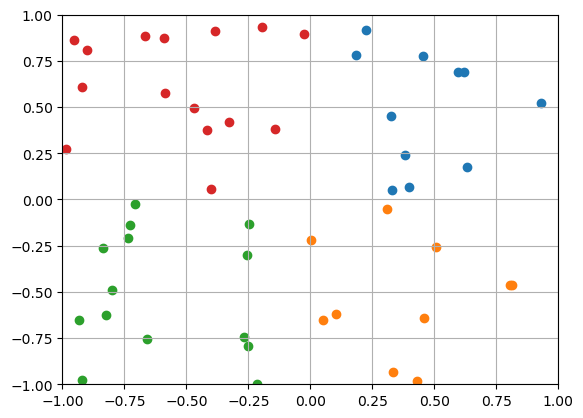

In [63]:
class Problem2:
    def generate(self):
        n = 50
        self.x = np.random.uniform(-1, 1, n)
        self.y = np.random.uniform(-1, 1, n)
    
    def display(self):
        idxs = (self.x >= 0) & (self.y >= 0) 
        plt.scatter(self.x[idxs], self.y[idxs], color='tab:blue')

        idxs = (self.x < 0) & (self.y >= 0) 
        plt.scatter(self.x[idxs], self.y[idxs], color='tab:red')

        idxs = (self.x >= 0) & (self.y < 0) 
        plt.scatter(self.x[idxs], self.y[idxs], color='tab:orange')

        idxs = (self.x < 0) & (self.y < 0) 
        plt.scatter(self.x[idxs], self.y[idxs], color='tab:green')

        # Limit
        plt.xlim(-1, 1); plt.ylim(-1, 1)
        plt.grid()
        

pr=Problem2()
pr.generate()
pr.display()

### **Problem3:**

Write a decorator that calls a function twice.

In [11]:
import functools

In [12]:
def call_twice(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args, **kwargs)
    return wrapper

@call_twice
def my_f(x):
    print('hi')
my_f(5)

hi
hi


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


In [44]:
import sympy as sp
from scipy.integrate import quad

In [29]:
# Define variable
x = sp.symbols('x')
y = sp.Function('y')

# Solve ODE
sol = sp.dsolve(sp.Eq(y(x).diff(x, x) + 9 * y(x) + x, 0))

In [30]:
# Confirm that solution is correct
(sol.rhs.diff(x, x) + 9 * sol.rhs + x).simplify()

0

In [31]:
sol

Eq(y(x), C1*sin(3*x) + C2*cos(3*x) - x/9)

In [43]:
# Set constant to 1
sol = sol.subs('C1', 1)
sol = sol.subs('C2', 1)

# Turn to function with lambdify
lamb = sp.lambdify(x, sol.rhs)

In [45]:
result, error = quad(lamb, 0, 10)
print("Result:", result)
print("Error:", error)

Result: -5.60298324688237
Error: 1.1617657301485302e-13


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```
 - Think of how to avoid using the loop to do these calculations.

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

In [57]:
mat

array([[  0. ,   0. ,   0. ,   0. ,   0. ],
       [ 25. ,   0.5,   0.5,   0.5,   0. ],
       [ 50. ,   0.5,   0.5,   0.5,   0. ],
       [ 75. ,   0.5,   0.5,   0.5,   0. ],
       [100. ,  75. ,  50. ,  25. ,   0. ]])

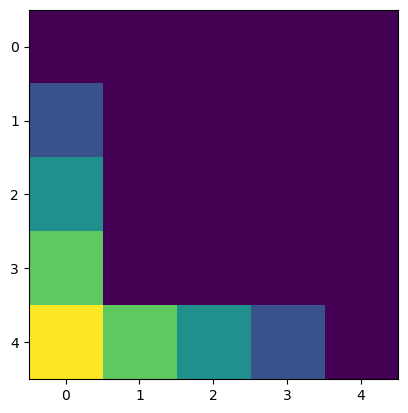

In [62]:
plt.imshow(mat)
# plt.xlim(0, m-0.5)